In [1]:
import dotenv
import os
from langchain_openai import AzureChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.messages import HumanMessage, SystemMessage

dotenv.load_dotenv('.env', verbose=True, override=True)

True



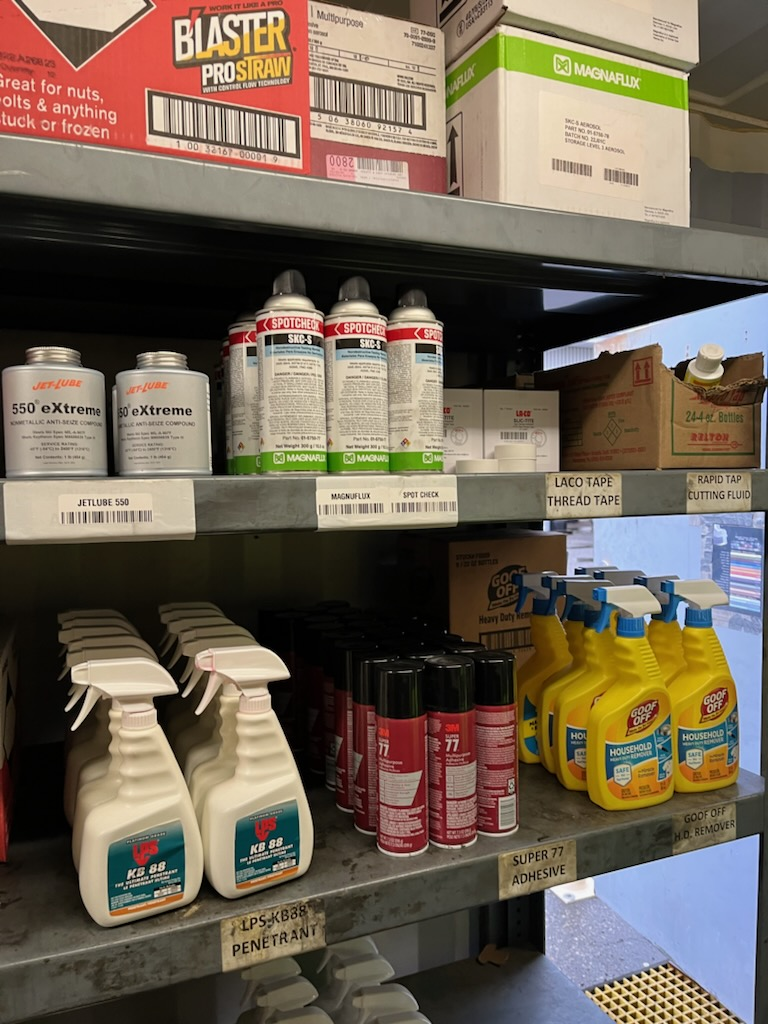

In [2]:
import base64

def read_image_as_base64(file_path):
    with open(file_path, "rb") as file:
        image_data = file.read()
        base64_data = base64.b64encode(image_data).decode("utf-8")
        base64_url = f"data:image/png;base64,{base64_data}"
    return base64_url

file_path = "./data/BulkImage1.png"  # Replace with the actual file path
base64_url = read_image_as_base64(file_path)
print(base64_url)


In [3]:
prompt = """
Analyze the image for product information. List contents as a single json object with properties for customer name and any descriptive 
information and one json array containing product description or identifying information the document contains in a tabular form.
Include column headings as a separate item in the array.
"""
COMPLETION_TOKENS = 2000
llm = AzureChatOpenAI(deployment_name=os.environ["GPT_DEPLOYMENT"], temperature=0.5, max_tokens=COMPLETION_TOKENS)
parser = StrOutputParser()
messages = [
    SystemMessage(content= prompt),
    HumanMessage(content=[
        # {
        #     "type": "text", 
        #     "text": "What'\''s in this image?"
        # },
        {
            "type": "image_url", 
            "image_url": {
                "url": base64_url
            }
        }
    ]),
]
# res = llm.invoke(messages)
# print(res)

chain = llm | parser
res = chain.invoke(messages)
print(res)

```json
{
  "customer_name": "Unknown",
  "products": [
    {
      "name": "JetLube 550 eXtreme",
      "description": "Anti-Seize Compound",
      "quantity": "Multiple cans"
    },
    {
      "name": "Magnuflux Spot Check SKC-S",
      "description": "Cleaner/Remover",
      "quantity": "Multiple cans"
    },
    {
      "name": "LPS KB 88",
      "description": "Penetrant",
      "quantity": "Multiple spray bottles"
    },
    {
      "name": "3M Super 77",
      "description": "Multipurpose Adhesive",
      "quantity": "Multiple cans"
    },
    {
      "name": "Goof Off",
      "description": "Heavy Duty Remover",
      "quantity": "Multiple spray bottles"
    }
  ]
}
```
